# Análise de Personalidade de Consumidores

### Informações do Aluno

- **Curso**: Programa de Pós-Graduação em Computação Aplicada - UnB
- **Disciplina**: Análise Estatística de Dados e Informação
- **Data**: 19 de janeiro de 2025
- **Autor**: Ebenezer Andrade da Silva
- **Matricula**: 241134715
- **Tarefa 6**

### Fonte dos Dados
Os dados utilizados neste notebook são públicos e estão disponíveis no Kaggle. Você pode acessá-los através do link abaixo:

[Customer Personality Analysis - Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

### Estrutura do Notebook
1. **Importação das Bibliotecas**
2. **Carregamento dos Dados**
3. **Discussão sobre o problema apresentado**
4. **Análise Exploratória de Dados (EDA)**
5. **Definição e Seleção de Modelos**
    - Pré-processamento dos dados
    - Treinamento dos modelos (Regressão Logística, Árvore de Decisão, Randon Forest, XGBoost)
    - Comparação de AUC-ROC dos modelos
8. **Explicabilidade das Variáveis Principais e Recomendações para a Tomada de Decisão (Análise de Negócio)**
9. **Conclusão**


### Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### Carregamento dos Dados

In [2]:
file_path = 'marketing_campaign.csv'
data = pd.read_csv(file_path, delimiter='\t')

### Discussão sobre o problema apresentado

O aumento do número de queixas registradas por consumidores é um sinal de alerta para a empresa pois está diretamente ligado ao nível de polarização negativa dos clientes com produtos, promoções e locais de venda. Com as informações detalhadas sobre o perfil dos clientes, é possível analisar e compreender os fatores que contribuem para as queixas e implementar ações estratégicas para mitigá-las.

Com a análise dessas queixas podemos oferecer insights estratégicos e operacionais para geração de valor como;

- Identificação dos padrões e perfis de clientes insatisfeitos: Através do cruzamento das variáveis como `Income` e `Education`, pode ocorrer relação entre classes socioeconômicas; `MnWines` e `MntMeatProducts`, clientes que consomem mais produtos específicos podem ter expectativas mais altas o que possívelmente gera mais reclamações; `Recency` Clientes que registraram queixas podem estar cada vez mais afastados, isso possibilita trabalhar com estratégias de reconquista.

- Avaliação da eficácia das promoções: A aceitação ou rejeição das campanhas de marketing pode estar correlacionada com reclamaçoẽs, logo é possível explorar a variável `AcceptedCmp`.


Portanto podemos realizar a análise deste conjunto de dados de forma que contribua para o Entendimento do Comportamento dos consumidores.

1- **Seguimentação de Clientes**: 
Identificar os padrões de comportamento por meio de variáveis como:

- Faixa etária (`Year_Birth`) e composição familiar (`Kidhome`, `Teenhome`);
- Preferências de consumo (analisando os gastos em diferentes categorias de produtos);
- Renda e estado civil, para entender perfis que reclamam mais e seus principais motivos;

2- **Prever o comportamento de insatisfação**:
Com um modelo preditivo baseado no histórico de reclamações (`Complain`), é possível identificar perfis de consumidores com alta probabilidade de registrar queixas. Isso permite: Adoção de ações preventivas, como atendimento personalizado ou ofertas específicas para esses clientes. E redução do número de reclamações futuras, mitigando insatisfações.

O problema das queixas de consumidores vai além da simples resolução de reclamações: ele é uma oportunidade para entender profundamente os clientes e identificar falhas nos processos, produtos ou estratégias de marketing. A análise dos dados permite não apenas prever comportamentos de insatisfação, mas também criar estratégias proativas para melhorar a experiência do cliente, aumentar a retenção e fortalecer a reputação no mercado.

### Análise Exploratória de Dados (EDA)

In [3]:
print("Informações do Conjunto de Dados:")
print(data.info())

Informações do Conjunto de Dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumD

In [4]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
print("Valores ausentes por variável:")
print(data.isnull().sum())

Valores ausentes por variável:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


Para facilitar a análise e o pré-processamento dos dados, decidi criar uma função que separa as colunas categóricas das numéricas. Essa função pode ser útil para os pipelines futuros

In [7]:
def separate_columns_by_type(data):
    numerical_columns = [column_name for column_name in data.columns if data[column_name].dtype in ['int64', 'float64']]
    categorical_columns = [column_name for column_name in data.columns if data[column_name].dtype == 'object']
    return numerical_columns, categorical_columns

numerical_columns, categorical_columns = separate_columns_by_type(data)

#### Distribuição das variáveis numéricas

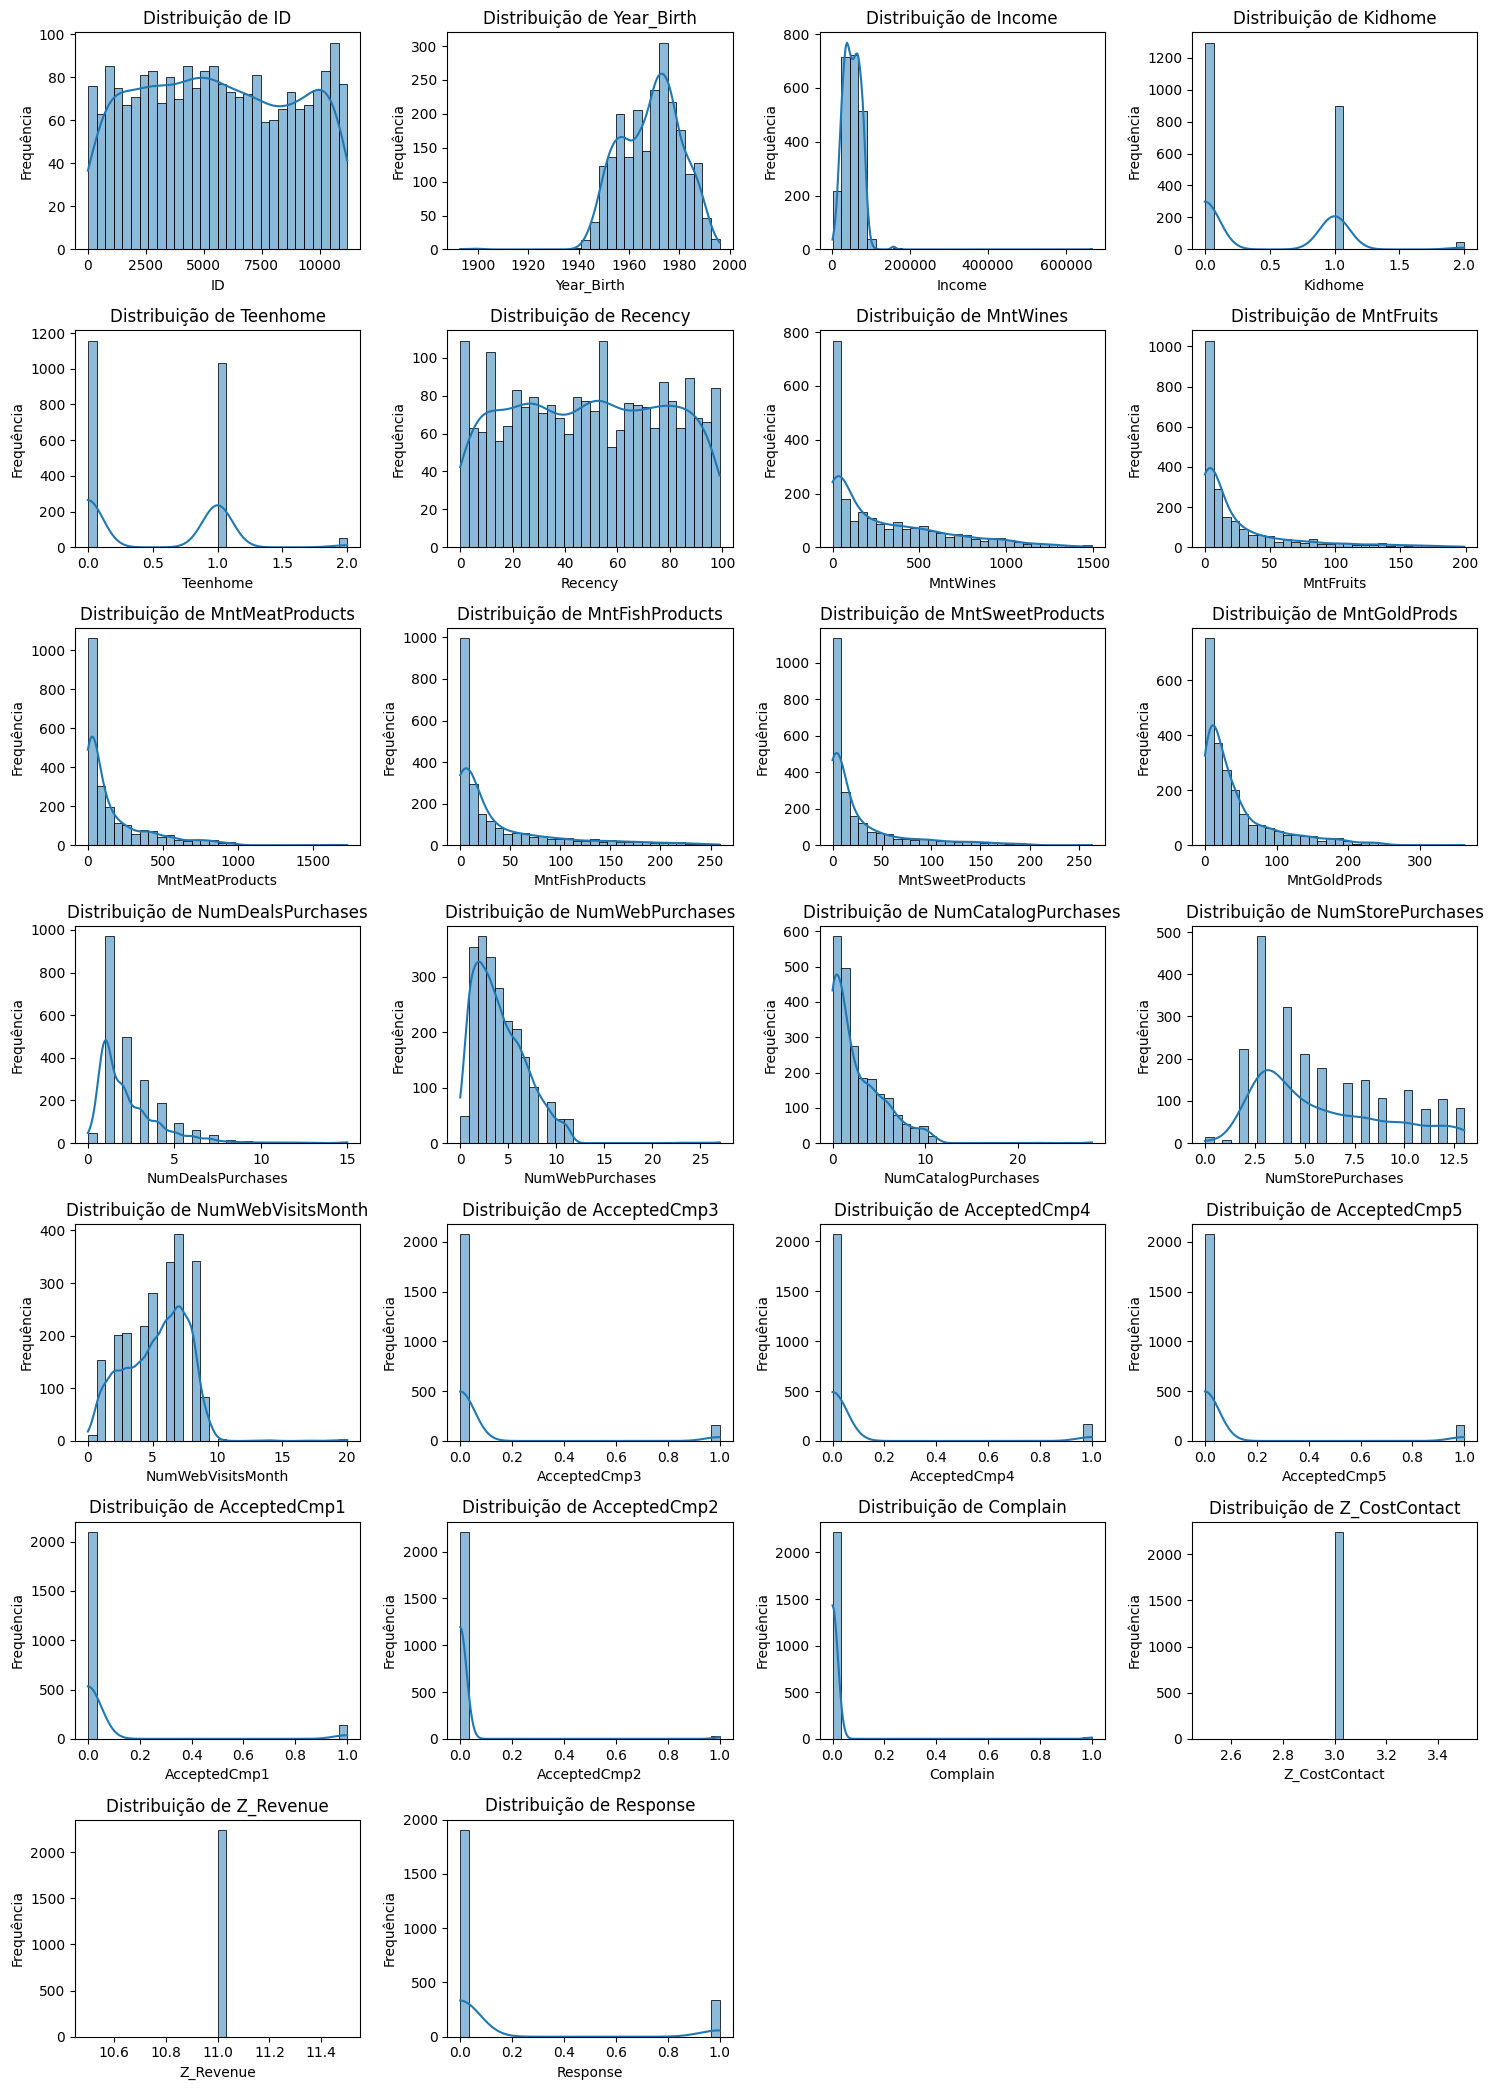

In [8]:
num_cols = 4
num_rows = math.ceil(len(numerical_columns) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
axes = axes.flatten()  

for i, col in enumerate(numerical_columns):
    sns.histplot(data[col].dropna(), kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Os gráficos de distribuição das variáveis numéricas, foram organizados em uma grade com múltiplos gráficos por linha. Variáveis como `Year_Birth` mostram a concentração da idade dos consumidores, com a maioria nascidos entre 1960 e 1980, enquanto `Income` apresenta forte assimetria à direita, indicando poucos consumidores de alta renda e muitos em faixas menores. As variáveis `Kidhome` e `Teenhome` revelam que a maioria das famílias não possui crianças ou adolescentes, enquanto os gastos em categorias de consumo (`Mnt*`) estão concentrados em valores baixos, com alguns outliers de alto gasto, especialmente em vinhos e carnes. Já as variáveis de comportamento (`Num*`) indicam diferentes padrões de compras em lojas físicas e online, sugerindo perfis distintos de consumidores.

As variáveis relacionadas a campanhas, queixas e comportamento online também apresentaram padrões relevantes como as variáveis de aceitação de campanhas promocionais (`AcceptedCmp1` a `AcceptedCmp5`) e `Response` indicam baixa adesão, com a maioria dos consumidores rejeitando as campanhas. A variável `Complain` é altamente desbalanceada, com a maioria dos consumidores não registrando reclamações, enquanto `NumWebVisitsMonth` revela que a maioria dos consumidores realizou entre 1 e 10 visitas ao site no último mês. Variáveis como `Z_CostContact` e `Z_Revenue` possuem distribuições fixas ou com pouca variabilidade, refletindo consistência operacional. Esses padrões destacam desafios em engajamento promocional e comportamento de reclamações, além de possíveis insights para segmentação de consumidores.

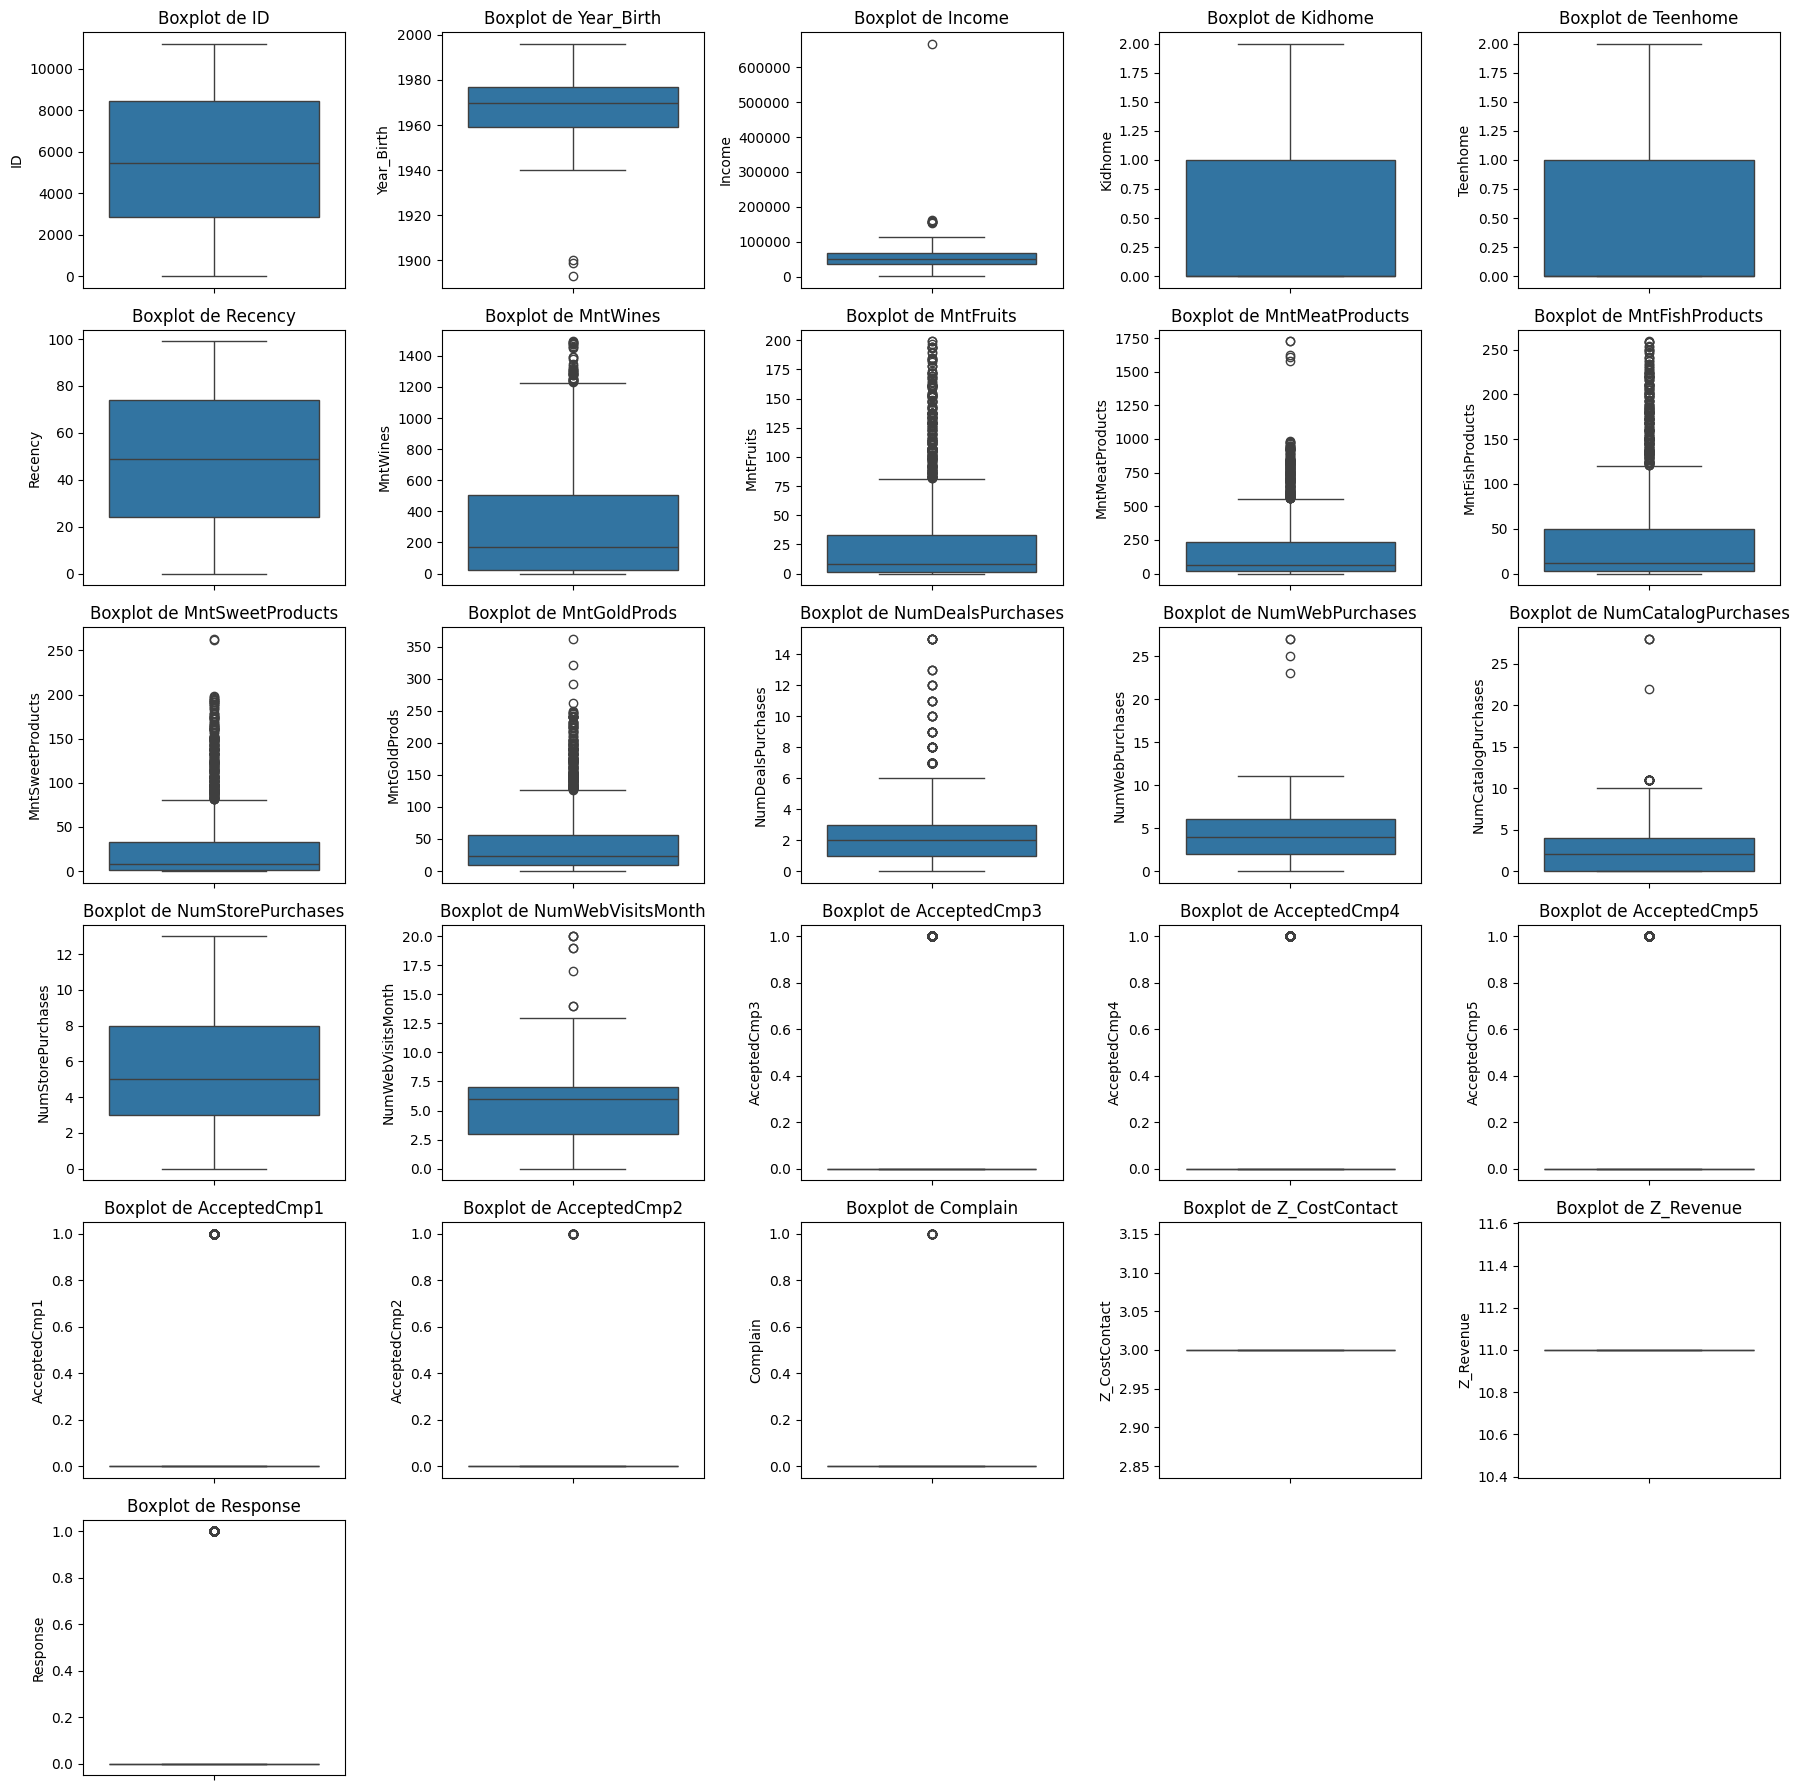

In [9]:
num_cols = 5
num_rows = math.ceil(len(numerical_columns) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 3 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout
plt.tight_layout()
plt.show()


#### Análise dos bloxplots
- Variáveis demográficas
  
A variável `Income` apresenta forte concentração em valores baixos, com outliers significativos representando rendas muito altas. Já as variáveis `Kidhome` e `Teenhome` têm distribuições concentradas em valores baixos (0 ou 1), indicando que a maioria das famílias possui poucos ou nenhum filho, o que reflete características demográficas comuns.

- Variáveis de consumo

As variáveis `MntWines`, `MntMeatProducts`, e `MntGoldProds` mostram concentrações em valores baixos, mas com muitos outliers que representam consumidores de alto gasto. Por outro lado, categorias como `MntFruits`, `MntFishProducts`, e `MntSweetProducts` têm menor dispersão, sugerindo gastos moderados e pouca variação entre os clientes.

- Variáveis de comportamento

As variáveis `NumWebPurchases`, `NumStorePurchases`, e `NumCatalogPurchases` apresentam distribuições uniformes com poucos outliers, enquanto `NumWebVisitsMonth` segue um padrão semelhante, mas com um pequeno grupo de consumidores que realizam visitas muito frequentes ao site, indicando variedade no engajamento digital.

- Variáveis de Campanhas e Reclamações

As variáveis `AcceptedCmp1` a `AcceptedCmp5` e `Complain` possuem valores altamente concentrados em 0, com poucos outliers em 1, o que reflete baixa adesão às campanhas promocionais e um número reduzido de reclamações registradas, o que sugere debalanceamento dessas variáveis.

- Outra variáveis (Considero como variáveis operacionais)

As variáveis `Z_CostContact` e `Z_Revenue` apresentam valores fixos ou com pouca variação, indicando consistência operacional e uniformidade entre os clientes, sem diferenças significativas para análise. Já a variável `Response`, que representa a resposta à última campanha promocional, é altamente desbalanceada, com a maioria dos consumidores concentrados no valor 0 (não responderam positivamente) e poucos valores iguais a 1, que pode ser considerados como outliers. Isso reflete uma baixa eficácia da campanha e destaca a necessidade de ações para melhorar o engajamento e a adesão às promoções.

In [10]:
outliers_summary = {}
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_limit) | (data[col] > upper_limit)]
    outliers_summary[col] = len(outliers)

print("\nNúmero de outliers por variável:")
print(outliers_summary)


Número de outliers por variável:
{'ID': 0, 'Year_Birth': 3, 'Income': 8, 'Kidhome': 0, 'Teenhome': 0, 'Recency': 0, 'MntWines': 35, 'MntFruits': 227, 'MntMeatProducts': 175, 'MntFishProducts': 223, 'MntSweetProducts': 248, 'MntGoldProds': 207, 'NumDealsPurchases': 86, 'NumWebPurchases': 4, 'NumCatalogPurchases': 23, 'NumStorePurchases': 0, 'NumWebVisitsMonth': 8, 'AcceptedCmp3': 163, 'AcceptedCmp4': 167, 'AcceptedCmp5': 163, 'AcceptedCmp1': 144, 'AcceptedCmp2': 30, 'Complain': 21, 'Z_CostContact': 0, 'Z_Revenue': 0, 'Response': 334}


Variáveis como `Income`, `NumWebVisitsMonth`, e `NumCatalogPurchases` possuem poucos outliers (menos de 10), indicando relativa consistência na distribuição. Já as variáveis de consumo (`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, e `MntGoldProds`) apresentam um número elevado de outliers, especialmente `MntSweetProducts` (248) e `MntFruits` (227), refletindo consumidores que gastam significativamente acima do padrão nessas categorias. As variáveis relacionadas a campanhas promocionais (`AcceptedCmp3` a `AcceptedCmp5`, `Response`) também possuem muitos outliers, com destaque para `Response` (334), indicando consumidores que se desviam do padrão de rejeição. Variáveis como `Z_CostContact` e `Z_Revenue` não apresentam outliers, sugerindo consistência. Esses padrões destacam a necessidade de atenção especial às variáveis de consumo e campanhas, onde os outliers podem refletir perfis de clientes específicos ou comportamentos fora do comum.

#### Relação entre Complain e outras variáveis (variável de interesse)

In [11]:
categorical_columns.remove('Dt_Customer')

removi a variável `Dt_Customer` porque ela não apresenta relevância visual ou interpretativa significativa quando tratada como uma variável categórica

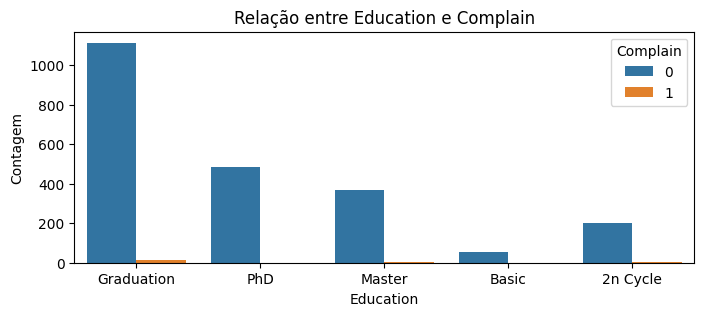

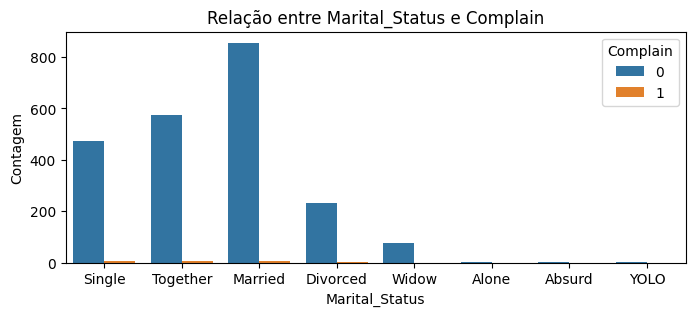

In [12]:
for col in categorical_columns:
    plt.figure(figsize=(8, 3))
    sns.countplot(x=col, hue='Complain', data=data)
    plt.title(f'Relação entre {col} e Complain')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.legend(title='Complain', loc='upper right')
    plt.show()

Os gráficos mostram que a maioria dos consumidores, independentemente do nível educacional (`Education`) ou estado civil (`Marital_Status`), não registrou reclamações (`Complain` = 0), evidenciando o desbalanceamento da variável. Consumidores com graduação (`Graduation`) e casados (`Married`) são os mais representativos tanto entre os que reclamaram quanto os que não reclamaram, enquanto categorias como Basic (educação básica) e estados civis menos frequentes (Alone, YOLO, Absurd) têm baixa representatividade. Esses padrões sugerem que `Education` e `Marital_Status` podem ter alguma relação com a propensão a reclamações e podem ser úteis na segmentação de clientes.

#### Correlação entre variáveis numéricas e 'Complain'

In [13]:
corr_vars = numerical_columns + ['Complain']
corr_matrix = data[corr_vars].corr()

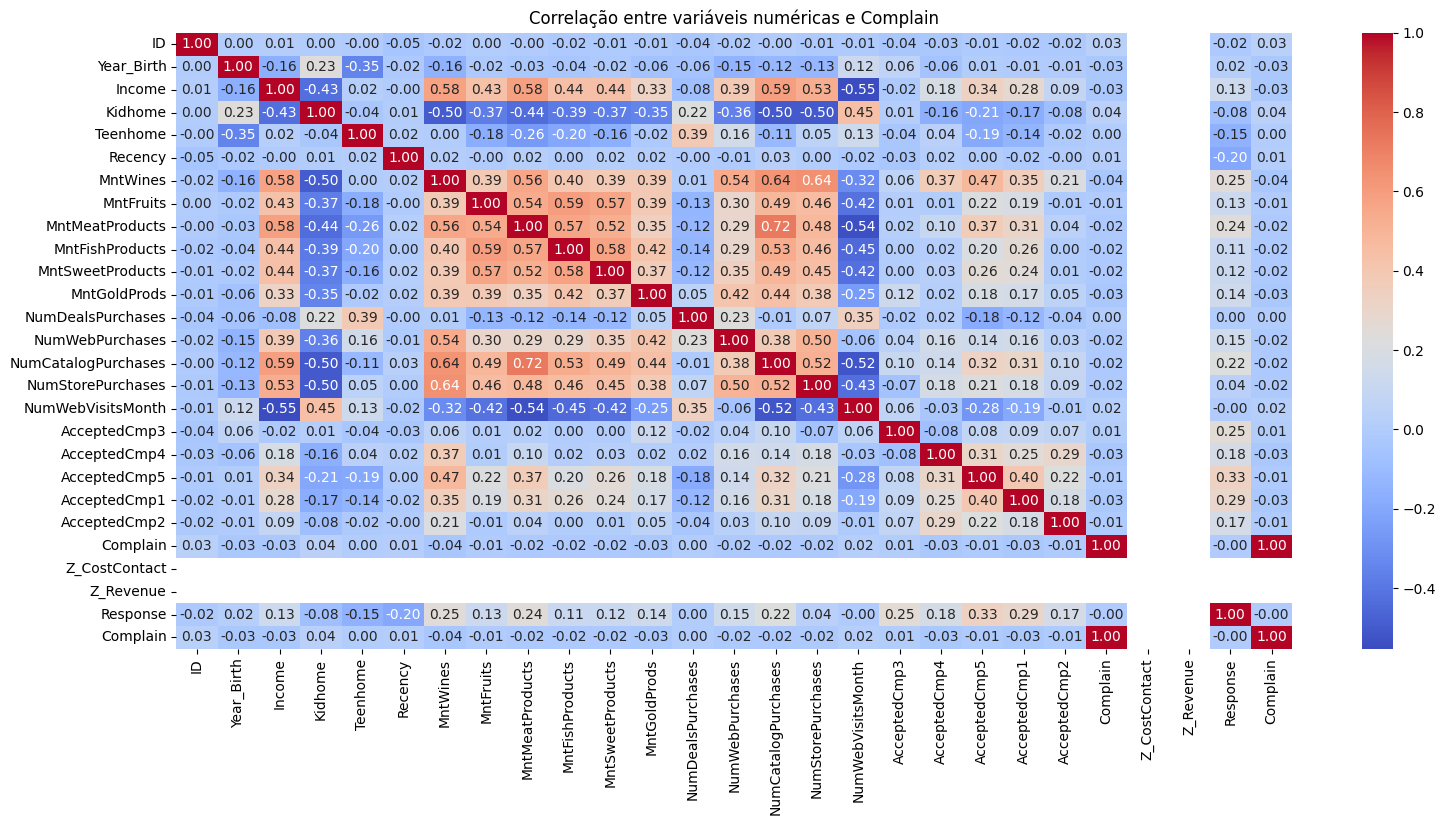

In [14]:
plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre variáveis numéricas e Complain')
plt.show()

A matriz apresenta relações fortes entre variáveis de consumo e comportamento, enquanto a variável-alvo `Complain` não apresenta correlações significativas com as variáveis numéricas. Essa análise sugere que os padrões de gastos e frequência de compras podem estar mais relacionados ao perfil do cliente do que diretamente às reclamações.

- Correlação entre variáveis de consumo (`Mnt*`)

As variáveis de gastos, como `MntWines`, `MntMeatProducts`, e `MntGoldProds`, têm correlações positivas significativas entre si (coeficientes acima de 0.5), indicando que consumidores que gastam muito em uma categoria também tendem a gastar mais em outras.

- Correlação entre variáveis de comportamento (`Num*`)

`NumWebPurchases`, `NumCatalogPurchases`, e `NumStorePurchases` também apresentam correlações positivas moderadas (em torno de 0.3 a 0.6), sugerindo que consumidores com maior frequência de compras em um canal têm comportamento consistente em outros canais.

- Correlação com `Complain`

A variável `Complain` possui correlações muito fracas (próximas de 0) com todas as variáveis, indicando que nenhuma das variáveis numéricas analisadas tem uma relação linear forte com a probabilidade de registro de reclamações. Isso pode sugerir que outros fatores, como variáveis categóricas ou interações não lineares, são mais relevantes para explicar reclamações.

#### Visualização de dados desbalanceados

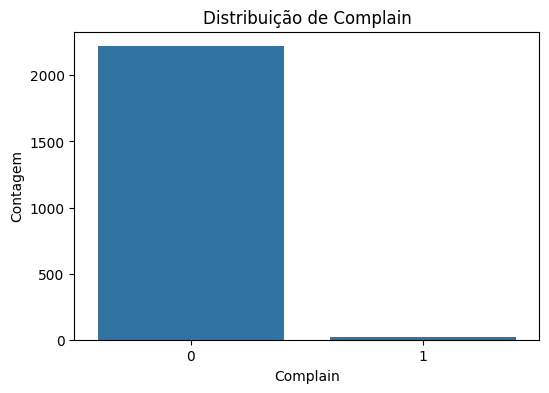

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Complain', data=data)
plt.title('Distribuição de Complain')
plt.xlabel('Complain')
plt.ylabel('Contagem')
plt.show()

A variável `Complain` apresenta uma distribuição altamente desbalanceada, com a maioria dos consumidores no grupo com valor 0 (não reclamaram) e um número muito pequeno no grupo com valor 1 (reclamaram)

### Definição e Seleção de Modelos

#### Pré-processamento dos dados

In [16]:
# Selecionar a variável alvo e os preditores
target = 'Complain'
predictors = list(set(data.columns) - {target})

In [17]:
# Preencher valores ausentes com a mediana
for col in predictors:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].median())

In [18]:
# converter as variáveis categóricas em variáveis numéricas para que possam ser usadas em modelos de ML
data = pd.get_dummies(data, columns=data.select_dtypes(include=['object']).columns, drop_first=True)

In [22]:
# separar o conjunto de dados em variáveis preditoras (X) e a variável alvo (y)
predictors = [col for col in data.columns if col != 'Complain'] 
X = data[predictors]
y = data['Complain']

#### Treinamento dos modelos

In [23]:
# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [24]:
# Definição dos modelos a serem testados
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=5000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=predictors)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=predictors)

# Treinamento e avaliação dos modelos ajustados
results = {}

for name, model in models.items():
    print(f"\nTreinando {name}...")
    # Treinamento
    model.fit(X_train_scaled, y_train)
    
    # Previsão
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidade para calcular AUC-ROC
    
    # Métricas
    print(f"Desempenho do {name}:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    auc = roc_auc_score(y_test, y_prob)
    print(f"AUC-ROC: {auc:.2f}")
    
    # Armazenando resultados
    results[name] = {
        'model': model,
        'accuracy': accuracy_score(y_test, y_pred),
        'auc': auc
    }



Treinando Logistic Regression...
Desempenho do Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       666
           1       0.05      0.17      0.08         6

    accuracy                           0.96       672
   macro avg       0.52      0.57      0.53       672
weighted avg       0.98      0.96      0.97       672

Matriz de Confusão:
[[647  19]
 [  5   1]]
AUC-ROC: 0.62

Treinando Decision Tree...
Desempenho do Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       666
           1       0.12      0.17      0.14         6

    accuracy                           0.98       672
   macro avg       0.56      0.58      0.57       672
weighted avg       0.98      0.98      0.98       672

Matriz de Confusão:
[[659   7]
 [  5   1]]
AUC-ROC: 0.58

Treinando Random Forest...
Desempenho do Random Forest:
              precision    recall  f1-score   sup

**Regressão Logística**

A Regressão Logística obteve AUC-ROC de 0.62, indicando uma capacidade moderada de distinção entre as classes. O modelo apresenta baixa precisão (0.05) e recall (0.17) para a classe minoritária, acertando apenas 1 das 6 reclamações. A alta acurácia geral (96%) reflete o domínio da classe majoritária, enquanto os falsos positivos (19) indicam alguma confusão do modelo ao classificar consumidores que não reclamaram.

**Árvore de decisão**

A Árvore de Decisão teve AUC-ROC de 0.58, com desempenho semelhante à Regressão Logística. O recall para a classe minoritária foi ligeiramente melhor (0.17), mas a precisão (0.12) permaneceu baixa. Apenas 1 das 6 reclamações foi corretamente prevista, enquanto 7 falsos positivos foram identificados. A acurácia geral foi alta (98%), mas devido ao desbalanceamento.

**Random Forest**

O modelo Random Forest teve um AUC-ROC de 0.47, indicando baixa capacidade de separação entre as classes. O recall para a classe minoritária foi de 0.17, mas a precisão foi alta (1.00), refletindo que apenas um exemplo positivo foi corretamente previsto sem falsos positivos. No entanto, 5 exemplos da classe minoritária foram erroneamente classificados, limitando o impacto do modelo no tratamento do desbalanceamento.

**XGBoost**

O XGBoost obteve o maior AUC-ROC de 0.64, sugerindo melhor capacidade de separação entre as classes. Porém, o modelo não conseguiu prever corretamente nenhuma das reclamações (precisão e recall iguais a 0), destacando dificuldades em aprender padrões da classe minoritária. A alta acurácia geral (99%) reflete o domínio da classe majoritária, mas a matriz de confusão evidencia a incapacidade de lidar com reclamações.

#### Comparação de AUC-ROC dos modelos

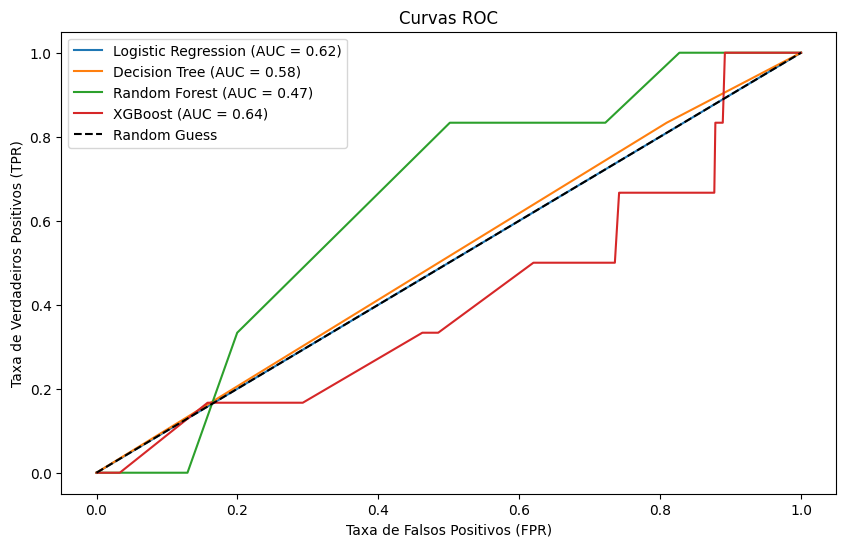

In [28]:
plt.figure(figsize=(10, 6))
for name, result in results.items():
    model = result['model']
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('Curvas ROC')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend()
plt.show()

In [29]:
melhor_modelo = max(results, key=lambda x: results[x]['auc'])
print(f"\nO melhor modelo foi: {melhor_modelo} com AUC-ROC = {results[melhor_modelo]['auc']:.2f}")


O melhor modelo foi: XGBoost com AUC-ROC = 0.64


### Explicabilidade das Variáveis Principais e Recomendações para a Tomada de Decisão (Análise de Negócio)

As variáveis principais que influenciam o registro de queixas foram identificadas com base nos modelos preditivos e análise de importância de variáveis

---

#### Identificação das Variáveis Mais Importantes
As variáveis mais importantes para prever o registro de queixas incluem:

- **Income**: Renda anual dos consumidores.
- **Recency**: Dias desde a última compra.
- **NumWebVisitsMonth**: Número de visitas ao site no último mês.
- **MntWines**: Gasto com vinhos nos últimos dois anos.
- **AcceptedCmp3**: Aceitação da terceira campanha promocional.

---

#### Interpretação das Variáveis

##### Income (Renda)
- **Impacto**: Consumidores com rendas mais altas tendem a registrar mais queixas, possivelmente devido a expectativas mais altas em relação a produtos e serviços.
- **Análise de Negócios**:
  - Implementar **atendimento personalizado** para consumidores de alta renda.
  - Criar **programas de fidelidade VIP** para melhorar a experiência e reduzir reclamações.

##### Recency (Recência)
- **Impacto**: Consumidores que não compram há muito tempo têm maior probabilidade de registrar queixas, possivelmente por experiências anteriores insatisfatórias.
- **Análise de Negócios**:
  - Desenvolver **campanhas de reconquista** para consumidores inativos.
  - Monitorar a **satisfação pós-compra** para evitar reclamações futuras.

##### NumWebVisitsMonth (Visitas ao site)
- **Impacto**: Consumidores com alta frequência de visitas podem registrar mais queixas devido a dificuldades na navegação ou problemas no site.
- **Análise de Negócios**:
  - Melhorar a **usabilidade do site** para evitar frustrações.
  - Implementar **suporte em tempo real**, como chatbots, durante a navegação.

##### MntWines (Gasto com vinhos)
- **Impacto**: Consumidores que gastam muito em vinhos estão mais propensos a registrar queixas, provavelmente devido à alta expectativa de qualidade.
- **Análise de Negócios**:
  - Garantir **qualidade consistente** nos produtos premium.
  - Oferecer **garantias ou trocas** para consumidores insatisfeitos.

##### AcceptedCmp3 (Aceitação de campanhas)
- **Impacto**: Consumidores que aceitam menos campanhas promocionais têm maior probabilidade de reclamar, indicando que as campanhas podem não estar alinhadas às expectativas.
- **Análise de Negócios**:
  - Reavaliar a **segmentação de campanhas promocionais**.
  - Criar ofertas personalizadas com base no histórico de consumo.

---




### Conclusão
A análise revelou que as reclamações dos consumidores estão ligadas a fatores como renda, recência de compras, comportamento online e gastos em produtos premium. Apesar do desbalanceamento da variável alvo, os padrões identificados oferecem insights para melhorar a experiência do cliente e reduzir queixas.